In [1]:

# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [2]:
# 2. Load the dataset (renamed as tested.csv)
df = pd.read_csv('tested.csv') 

In [3]:
# 3. Understand the data
print("Shape of data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescription:")
print(df.describe(include='all'))

Shape of data: (418, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Description:
        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN    

In [7]:
# 4. Fill missing Age values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


In [8]:
# 5. Fill missing Cabin values with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [9]:
# 6. Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

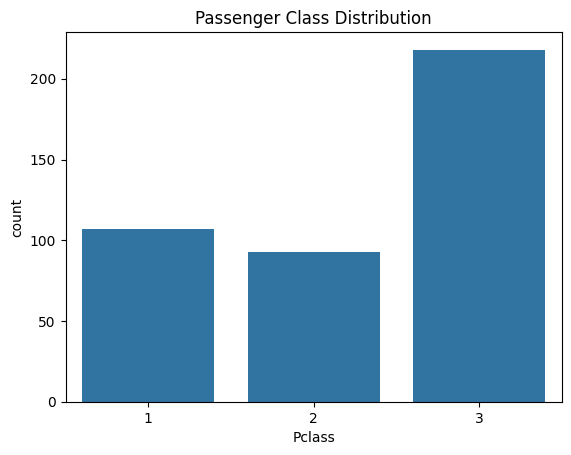

In [10]:
# 7. Analyze the passenger Class using countplot
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

In [11]:
# 8. List names of female passengers who survived
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:\n", female_survivors['Name'])


Female passengers who survived:
 1                     Wilkes, Mrs. James (Ellen Needs)
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
6                                 Connolly, Miss. Kate
8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)
                            ...                       
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
Name: Name, Length: 152, dtype: object


In [12]:
# 9. Passengers in 3rd class and under age 18
third_class_under18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd class passengers under 18:\n", third_class_under18[['Name', 'Age', 'Pclass']])


3rd class passengers under 18:
                                           Name    Age  Pclass
5                   Svensson, Mr. Johan Cervin  14.00       3
21                   Olsen, Master. Artur Karl   9.00       3
55                        Rice, Master. Albert  10.00       3
60                             Dika, Mr. Mirko  17.00       3
80                        Boulos, Master. Akar   6.00       3
104  Thomas, Mrs. Alexander (Thamine Thelma")"  16.00       3
117            Sandstrom, Miss. Beatrice Irene   1.00       3
125                   Cribb, Miss. Laura Alice  17.00       3
140                Goodwin, Miss. Jessie Allis  10.00       3
154               Asplund, Master. Filip Oscar  13.00       3
161             Touma, Master. Georges Youssef   7.00       3
187                         Davies, Mr. Joseph  17.00       3
192          van Billiard, Master. Walter John  11.50       3
201    Danbom, Master. Gilbert Sigvard Emanuel   0.33       3
263               Klasen, Miss. Gertr

In [13]:
# 10. Passengers in 1st class older than 40
class1_above40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 passengers older than 40:\n", class1_above40[['Name', 'Age']])



Class 1 passengers older than 40:
                                                   Name   Age
11                          Jones, Mr. Charles Cresson  46.0
14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...  47.0
20                              Rothschild, Mr. Martin  55.0
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  48.0
28                             Brady, Mr. John Bertram  41.0
44    Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)  45.0
46                            Chevre, Mr. Paul Romaine  45.0
48     Bucknell, Mrs. William Robert (Emma Eliza Ward)  60.0
67                      Moore, Mr. Clarence Bloomfield  47.0
69                 Fortune, Mrs. Mark (Mary McDougald)  60.0
77   Cornell, Mrs. Robert Clifford (Malvina Helen L...  55.0
81                                  Straus, Mr. Isidor  67.0
82                              Case, Mr. Howard Brown  49.0
96   Cavendish, Mrs. Tyrell William (Julia Florence...  76.0
100  Stengel, Mrs. Charles Emil Henry (Annie May 

In [14]:
# 11. Survived passengers from above category
survived_class1_above40 = class1_above40[class1_above40['Survived'] == 1]
print("\nSurvived Class 1 passengers older than 40:\n", survived_class1_above40[['Name', 'Age']])


Survived Class 1 passengers older than 40:
                                                   Name   Age
14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...  47.0
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  48.0
44    Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)  45.0
48     Bucknell, Mrs. William Robert (Emma Eliza Ward)  60.0
69                 Fortune, Mrs. Mark (Mary McDougald)  60.0
77   Cornell, Mrs. Robert Clifford (Malvina Helen L...  55.0
96   Cavendish, Mrs. Tyrell William (Julia Florence...  76.0
100  Stengel, Mrs. Charles Emil Henry (Annie May Mo...  43.0
114             Straus, Mrs. Isidor (Rosalie Ida Blun)  63.0
179  Compton, Mrs. Alexander Taylor (Mary Eliza Ing...  64.0
218       Widener, Mrs. George Dunton (Eleanor Elkins)  50.0
224   Candee, Mrs. Edward (Helen Churchill Hungerford)  53.0
239        Douglas, Mrs. Walter Donald (Mahala Dutton)  48.0
240          Lindstrom, Mrs. Carl Johan (Sigrid Posse)  55.0
305  Crosby, Mrs. Edward Gifford (Cather

In [15]:
# 12. Male passengers who paid fare > 100
high_fare_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:\n", high_fare_males[['Name', 'Fare']])


Male passengers who paid fare > 100:
                                      Name      Fare
64            Ryerson, Master. John Borie  262.3750
75                     Keeping, Mr. Edwin  211.5000
81                     Straus, Mr. Isidor  221.7792
142            Ryerson, Mr. Arthur Larned  262.3750
196       Spedden, Master. Robert Douglas  134.5000
202                Astor, Col. John Jacob  227.5250
217              Wick, Mr. George Dennick  164.8667
242          Spedden, Mr. Frederic Oakley  134.5000
252              Clark, Mr. Walter Miller  136.7792
306  Allison, Mr. Hudson Joshua Creighton  151.5500
316         Spencer, Mr. William Augustus  146.5208
407            Widener, Mr. George Dunton  211.5000


In [16]:
# 13. Passengers embarked from 'C' and in Class 2
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers from port 'C' and Class 2:\n", embarked_c_class2[['Name', 'Embarked', 'Pclass']])


Passengers from port 'C' and Class 2:
                                               Name Embarked  Pclass
15   del Carlo, Mrs. Sebastiano (Argenia Genovesi)        C       2
51                              Pulbaum, Mr. Franz        C       2
54               Mangiavacchi, Mr. Serafino Emilio        C       2
110                       Stanton, Mr. Samuel Ward        C       2
220                 Duran y More, Miss. Florentina        C       2
264         Portaluppi, Mr. Emilio Ilario Giuseppe        C       2
296                          Laroche, Miss. Louise        C       2
301                            Malachard, Mr. Noel        C       2
361        Mallet, Mrs. Albert (Antoinette Magnin)        C       2
369                  Pallas y Castello, Mr. Emilio        C       2
405   Nourney, Mr. Alfred (Baron von Drachstedt")"        C       2


In [17]:
# 14. Passengers with more than 2 siblings/spouses aboard
sibsp_gt2 = df[df['SibSp'] > 2]
print("\nPassengers with more than 2 siblings/spouses aboard:\n", sibsp_gt2[['Name', 'SibSp']])


Passengers with more than 2 siblings/spouses aboard:
                                        Name  SibSp
53               Fortune, Miss. Ethel Flora      3
55                     Rice, Master. Albert      4
140             Goodwin, Miss. Jessie Allis      5
145               Vander Planke, Mr. Julius      3
154            Asplund, Master. Filip Oscar      4
188                         Sage, Miss. Ada      8
214  Andersson, Miss. Ida Augusta Margareta      4
360             Sage, Master. William Henry      8
379             Asplund, Master. Carl Edgar      4
389             Palsson, Master. Paul Folke      3
394                Kink-Heilmann, Mr. Anton      3


In [18]:
# 15. Passengers who did not survive and had no family aboard
no_family_nosurvive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nDid not survive and no family aboard:\n", no_family_nosurvive[['Name', 'Survived', 'SibSp', 'Parch']])


Did not survive and no family aboard:
                                              Name  Survived  SibSp  Parch
0                                Kelly, Mr. James         0      0      0
2                       Myles, Mr. Thomas Francis         0      0      0
3                                Wirz, Mr. Albert         0      0      0
5                      Svensson, Mr. Johan Cervin         0      0      0
10                               Ilieff, Mr. Ylio         0      0      0
..                                            ...       ...    ...    ...
403                        Carrau, Mr. Jose Pedro         0      0      0
405  Nourney, Mr. Alfred (Baron von Drachstedt")"         0      0      0
413                            Spector, Mr. Woolf         0      0      0
415                  Saether, Mr. Simon Sivertsen         0      0      0
416                           Ware, Mr. Frederick         0      0      0

[185 rows x 4 columns]


In [19]:
# 16. Top 5 oldest passengers who survived
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:\n", oldest_survivors[['Name', 'Age']])



Top 5 oldest passengers who survived:
                                                   Name   Age
96   Cavendish, Mrs. Tyrell William (Julia Florence...  76.0
179  Compton, Mrs. Alexander Taylor (Mary Eliza Ing...  64.0
305  Crosby, Mrs. Edward Gifford (Catherine Elizabe...  64.0
114             Straus, Mrs. Isidor (Rosalie Ida Blun)  63.0
48     Bucknell, Mrs. William Robert (Emma Eliza Ward)  60.0


In [20]:
# 17. Passengers who paid zero fare
zero_fare = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:\n", zero_fare[['Name', 'Fare']])


Passengers who paid zero fare:
                                       Name  Fare
266  Chisholm, Mr. Roderick Robert Crispin   0.0
372                Ismay, Mr. Joseph Bruce   0.0


In [21]:
# 18. Split dataset for training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("\nTrain shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (334, 12)
Test shape: (84, 12)
